<div class="alert alert-block alert-info">
<span style="font-size:xx-large;"><center>Integration</center></span>
</div>

Now we would like to compute the following integral :
$$\int_{-1}^{1} \frac{1}{1+25x^2}dx$$

I will not ask you to compute analytically this integral (but you should be ablo to do it)  
the solution is  
$$\frac{2}{5}\arctan(5)$$

Store this value in a variable `solution`

This variable will be use later to check the precision of th different methods.

Define the function $\text{runge}(x)= \frac{1}{1+25x^2}$

Plot the function between for $x\in\left[-1,1\right]$

<IPython.core.display.Javascript object>


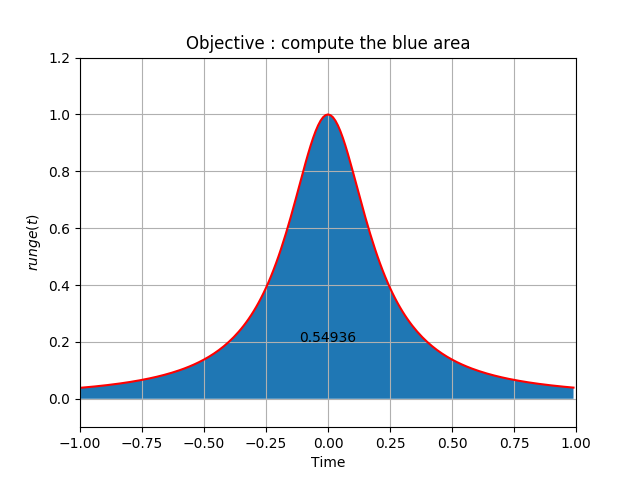

In [39]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

xmin = -1.0
xmax =  1.0

t = np.arange(xmin, xmax, 0.01)

fig, ax = plt.subplots()

plt.fill_between(t, 0, runge(t))
plt.plot(t, runge(t), 'r-')
ax.set_xlim(xmin,xmax)
ax.set_ylim(-0.1,1.2)
plt.xlabel("Time")
plt.ylabel("$runge(t)$")
plt.title('Objective : compute the blue area') 
plt.text(0.,0.2,"{:7.5f}".format(solution),ha="center")
ax.grid()
plt.show()

# The rectangle rule
Integrating is difficult, let's keep thing simple :  
I know how to integrate a constant!  
What if I consider the curve to be some kind of a stair : 
<img src="Integration_rectangle.svg" alt="Flowchart" style="height: 120px"/>

I can consider that the function is constant between $x_\text{min}$ and $x_\text{max}$.

$$\begin{align}
\int_{x_\text{min}}^{x_\text{max}} { f(x) dx} &\approx \int_{x_\text{min}}^{x_\text{max}} { C dx}\\
&=C (x_\text{max} - x_\text{min}) \\
\end{align}$$
With $C = f(\frac{x_\text{max} + x_\text{min}}{2})$.  
(In fact I could have taken $f(x_\text{min})$ or $f(x_\text{max})$ it would not be very different)


We will consider that all steps are equally large  
Write a function `rectangle_integ(N)` that, given a number of points `N`, compute
1. the step width `dx`
2. the positions `rect_x` of the center of each rectangle
3. the heights `rect_y` of each rectangle
4. the value of the integral's approximation `integ`
4. return the values `rect_x`, `rect_y` and `integ`

Test it with 10 steps :

[-0.9 -0.7 -0.5 -0.3 -0.1  0.1  0.3  0.5  0.7  0.9] [0.04705882 0.0754717  0.13793103 0.30769231 0.8        0.8
 0.30769231 0.13793103 0.0754717  0.04705882] 0.5472615455270741


If you correctly wrote your function, the cell bellow should work

<IPython.core.display.Javascript object>


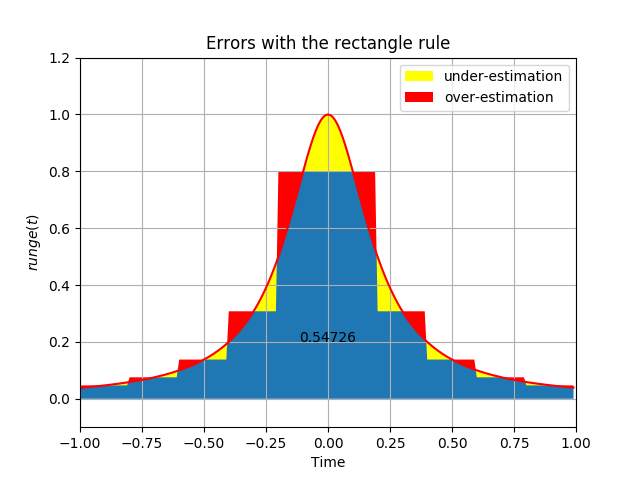

In [41]:
rect_x, rect_y, integ = rectangle_integ(10)
dx = rect_x[1] - rect_x[0]

def rectangles(x):
    xx = ((x-xmin) // dx).astype(np.int)
    return rect_y[xx]

fig, ax = plt.subplots()

ax.plot(t, runge(t),'r-')
plt.fill_between(t, 0, runge(t))
ax.fill_between(t, rectangles(t), runge(t), where=runge(t) >= rectangles(t),
                facecolor='yellow', interpolate=True, label="under-estimation")
ax.fill_between(t, rectangles(t), runge(t), where=runge(t) <= rectangles(t),
                facecolor='red', interpolate=True, label="over-estimation")
ax.set_xlim(xmin,xmax)
ax.set_ylim(-0.1,1.2)
plt.xlabel("Time")
plt.ylabel("$runge(t)$")
plt.title('Errors with the rectangle rule') 
plt.text(0.,0.2,"{:7.5f}".format(integ),ha="center")
ax.grid()
plt.legend()
plt.show()

# Trapezoidal rule
Hey but this correspond to the area of simple geometric shapes  
I also know how to compute area of a trapezoid!
<img src="Integration_trapezoid.svg" alt="Flowchart" style="height: 120px"/>

$$\begin{align}
\int_{x_\text{min}}^{x_\text{max}} { f(x) dx} &= (x_\text{max} - x_\text{min}) \left(\frac{ f(x_\text{max}) + f(x_\text{min})}{2}\right)
\end{align}$$

We will consider that all steps are equally large  
Write a function `trapez_integ(N)` that, given a number of points `N`, compute
1. the step width `dx`
2. the positions `trapz_x` of the edge of each trapezoidal
3. the heights `trapz_y` of each edge of each trapezoidal
4. the value of the integral's approximation `integ`
4. return the values `trapz_x`, `trapz_y` and `integ`

Test it with 10 steps :

0.5512217194570137


If you correctly wrote your function, the cell bellow should work

<IPython.core.display.Javascript object>


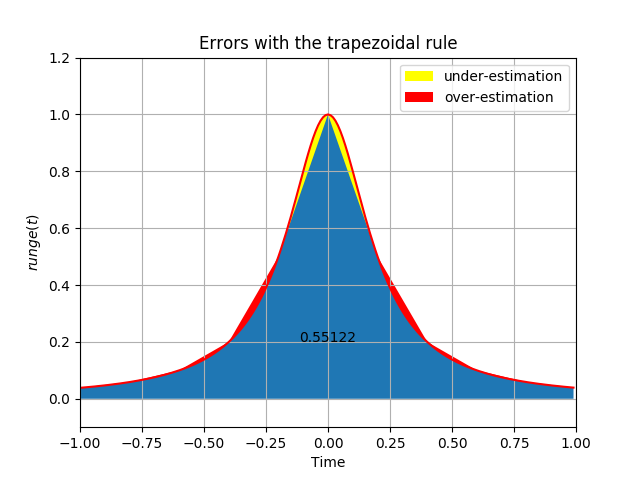

In [43]:
trapz_x, trapz_y, integ = trapez_integ(10)
dx = trapz_x[1] - trapz_x[0]

def trapezoids(x):
    i1 = ((x-xmin) // dx).astype(np.int)
    i2 = i1 + 1 
    x1 = trapz_x[i1]
    x2 = trapz_x[i2]
    
    y1 = trapz_y[i1]
    y2 = trapz_y[i2]
    
    a = (y2-y1) / (x2-x1)
    b = y1 - a * x1
    
    return a * x + b 

fig, ax = plt.subplots()

ax.plot(t, runge(t),'r-')
plt.fill_between(t, 0, runge(t))
ax.fill_between(t, trapezoids(t), runge(t), where=runge(t) >= trapezoids(t),
                facecolor='yellow', interpolate=True, label="under-estimation")
ax.fill_between(t, trapezoids(t), runge(t), where=runge(t) <= trapezoids(t),
                facecolor='red', interpolate=True, label="over-estimation")
ax.set_xlim(xmin,xmax)
ax.set_ylim(-0.1,1.2)
plt.xlabel("Time")
plt.ylabel("$runge(t)$")
plt.title('Errors with the trapezoidal rule') 
plt.text(0.,0.2,"{:7.5f}".format(integ),ha="center")
ax.grid()
plt.legend()
plt.show()

# Polynoms

In fact, it looks like I'm integrating an easier version of the function.  
Last week we learn a way to approximate a function with a polynom.  

What happen if
1. we take a number of evenly spaced of points,
2. use them to approximate the function `runge`
3. compute the integral of this polynom

First let's write a function `approx_poly(x,y)` that compute the coefficients of the poynom that best approximate this function (remember what we've done last week)

Now we need the integrate this polynom.
using this formula, this is easily done :
$$ \int_a^b cx^idx = \left[\frac{c}{i+1}x^{i+1} \right]_a^b = \frac{c}{i+1}b^{i+1} - \frac{c}{i+1}a^{i+1}$$

Write a function `integ_poly(coefs)` that compute the integral bellow a polynom

Here is a function that plot graph of the error (similar to what I made before)

In [19]:
def graph_poly(x, coefs):
    fig, ax = plt.subplots()

    t = np.arange(xmin, xmax+0.01, 0.01)

    ax.plot(t, runge(t),'r-')

    ax.plot(t, poly(t, coefs),'k-')
    ax.plot(x, poly(x, coefs),'ko')

    ax.fill_between(t, poly(t, coefs), runge(t), where=runge(t) >= poly(t, coefs),
                    facecolor='yellow', interpolate=True, label="under-estimation")
    ax.fill_between(t, poly(t, coefs), runge(t), where=runge(t) <= poly(t, coefs),
                    facecolor='red', interpolate=True, label="over-estimation")
    
    ax.set_xlim(xmin,xmax)
    ax.set_ylim(-0.1,1.2)
    plt.xlabel("Time")
    plt.ylabel("$runge(t)$")
    plt.title('Errors with polynoms') 
    plt.text(0.,0.2,"{:7.5f}".format(integ_poly(coefs)),ha="center")
    ax.grid()
    plt.legend()
    plt.show()

Try (plot) your function for differents number of points.

<IPython.core.display.Javascript object>


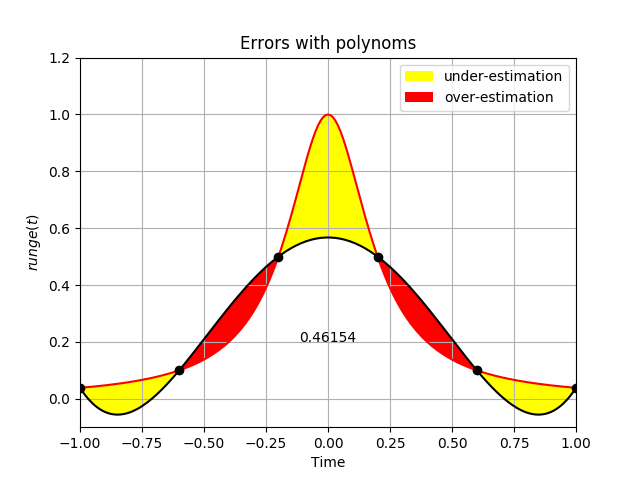

Arg! We still have the instabilities we saw last week.  
Maybe redistributing the points will give better results

Try (plot) your function for differents number of points with the `new_x` points distribution.

<IPython.core.display.Javascript object>


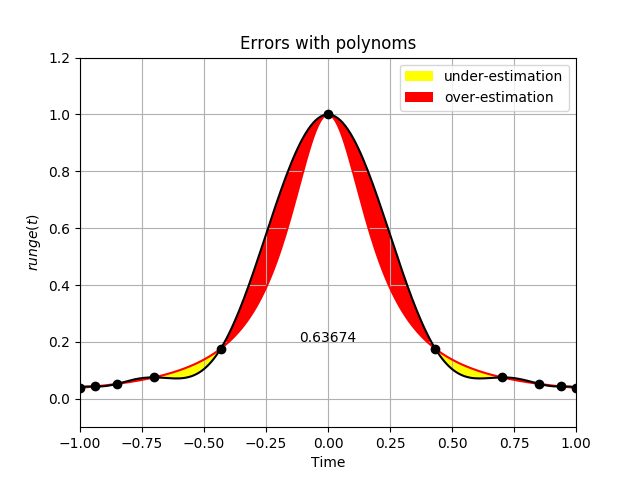

In [49]:
npoints=11
old_x = np.linspace(xmin,xmax,npoints)
new_x = np.arctan(3*old_x)
new_x /= np.max(new_x)

# add here what you need to use your method


Arg this converge sooooo slowly !
This is the main reason why we prefer spline over high order polynomials

# Scipy

Usually you don't need to write yourself all the algorithms, the python community did that for you !

For exemple you might have used scipy.

Plot the evolution of the error as a function of the number of iteration for your three methods and romb from scipy.


<div class="alert alert-block alert-danger">
<span style="font-size:xx-large;">
    <center>
        **Do not forget**
    </center>
</span>
</div>

Once all cells have been **filled** and **executed**, save this document as a pdf file (by printing it)  
Check that everything is present on the produced pdf  
Send **the pdf AND the notebook** to me via Universitice  
This will be used to evaluate you.

<div class="alert alert-block alert-info">
<span style="font-size:xx-large;"><center>That's it for today !</center></span>
</div>